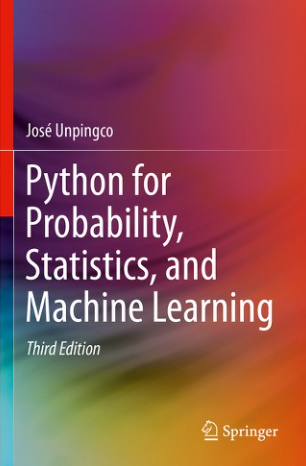

# 3.5 Hypothesis Testing and P-Values

## 3.5.1 Back to the Coin Flipping Example

In [ ]:
from sympy import Symbol
from sympy.stats import P, Binomial
import numpy as np
import matplotlib.pyplot as plt

theta = Symbol('theta', real = True)
X = Binomial('x',100, theta)
beto_function = P(X>60)
print(beto_function.subs(theta, 0.5)) # alpha
print(beto_function.subs(theta, 0.7))
print(beto_function.subs(theta, 0.8))

0.0176001001088524
0.979011423996075
0.999996391579885


In [ ]:
from scipy import stats
rv = stats.bernoulli(0.5) # true p = 0.5
# number of false positive ~ 0.018
print(sum(rv.rvs((1000,100)).sum(axis=1)>60)/1000.)
# 1000 trails where each trial consists of 100 coin flips.
# sum of the columns that have more than 60 heads
# result: Probability of FP when true P = 0.5

0.018


## 3.5.2 Receiver Operating Characteristic (ROC)

AUC (0.5 ~ 1)
- Area under ROC.
- Bigger AUC is better binary classification model.

## 3.5.4 Test Statistics

Neyman-Pearson test  
- Maximize L(x) (likelihood ratio)  
- L < threshold: H0
- Choose the threshold with fixed alpha

In [ ]:
import sympy as S
from sympy import stats
s = stats.Normal('s',1,1) # signal + noise (mu = 1)
n = stats.Normal('n',0,1) # noise (mu = 0)
x = S.symbols('x', real= True)

# L(x)
L = stats.density(s) (x) / stats.density(n) (x) # H1 / H0

# find the threshold g
g = S.symbols('g', positive = True)
v = S.integrate(stats.density(n) (x),
                (x, S.Rational(1,2) + S.log(g), S.oo)) # integrationg ($\frac{1}{2} + \log(g)$ ~ infinite)
S.nsolve(v-0.01, 3.0) # alpha = 0.01, initial guess of g = 3.0

6.21116124253284

L(x) < 6.21116124253284 : H0  
L(x) > 6.21116124253284 : H1

# 3.6 Confidence Intervals

- Hoeffding's inequality   
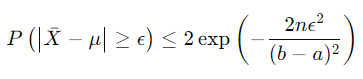  

In [4]:
from scipy import stats
import numpy as np

b = stats.bernoulli(0.5) # Coin
nsamples = 100
# flip nsamples times for 200 estimates
xs = b.rvs(nsamples*200).reshape(nsamples, -1)
phat = np.mean(xs, axis = 1) # mean of each row, estimated p

# edge of 95% CI
epsilon_n = np.sqrt(np.log(2/0.05)/(2*nsamples))
pct = np.logical_and(phat - epsilon_n < 0.5, 0.5 < phat + epsilon_n).mean() *100

print('Interval trapped correct value ', pct,'% of the time')

# edge of 99% CI
epsilon_n = np.sqrt(np.log(2/0.01)/(2*nsamples))
pct = np.logical_and(phat - epsilon_n < 0.5, 0.5 < phat + epsilon_n).mean() *100

print('Interval trapped correct value ', pct,'% of the time')

Interval trapped correct value  100.0 % of the time
Interval trapped correct value  100.0 % of the time


- Instead of this, we can use asymptotic normality 성질  
- phat ~ N (p, se_hat^2)  
- ∫ N(0,se_hat^2) > 1 - α

In [5]:
# compute estimated se for all trials
se = np.sqrt(phat*(1-phat)/xs.shape[0])
# generate rv for trial 0
rv = stats.norm(0, se[0])
# comput 95% CI for that trial 0
np.array(rv.interval(0.95)) + phat[0]

array([0.46783341, 0.66216659])

In [6]:
def compute_CI(i):
    return stats.norm.interval(0.95, loc = i, scale = np.sqrt(i*(1-i)/xs.shape[0]))
lower, upper = compute_CI(phat)
print(lower, upper)

[0.46783341 0.41704591 0.35249302 0.3970067  0.38704591 0.41704591
 0.42712438 0.43724219 0.45249302 0.4020018  0.46270995 0.46270995
 0.42208023 0.38208023 0.46270995 0.45759649 0.38704591 0.37217836
 0.3970067  0.37712438 0.46783341 0.34270995 0.42712438 0.4423159
 0.3920214  0.37712438 0.43724219 0.42208023 0.48326431 0.37217836
 0.37217836 0.46783341 0.36724219 0.45249302 0.43217836 0.4120214
 0.4070067  0.42712438 0.38704591 0.45249302 0.47296694 0.42712438
 0.41704591 0.42712438 0.43217836 0.4070067  0.41704591 0.38704591
 0.43217836 0.4423159  0.37712438 0.38704591 0.37217836 0.34270995
 0.46270995 0.36724219 0.37217836 0.4070067  0.4020018  0.3970067
 0.4020018  0.42208023 0.37217836 0.4070067  0.34759649 0.43217836
 0.35249302 0.3920214  0.42712438 0.38704591 0.45249302 0.36724219
 0.3970067  0.45249302 0.3920214  0.4120214  0.4423159  0.38704591
 0.38704591 0.3970067  0.3920214  0.38704591 0.4423159  0.45759649
 0.38704591 0.34270995 0.38704591 0.38208023 0.3920214  0.4473995